# Chepter 04. Model Training #

In [1]:
# lib import
import numpy as np
import pandas as pd
import tensorflow as tf
import sklearn
import matplotlib.pyplot as plt
import os
import sys
import math

## 수학적으로 모델 파라미터 구현하기 ##

### 선형 회귀 모델 함수 (Linear Regression Model Function) 구현 ###  



In [5]:
# 임의의 점 생성

X = 2 * np.random.rand(100, 1) # X 좌표를 랜덤하게 생성
y = 4 + 3 * X + np.random.randn(100, 1) # y좌표는 X 좌표에 가우시안 노이즈를 더한 뒤 3배 + 4


랜덤 수를 생성한 후 plt로 시각화

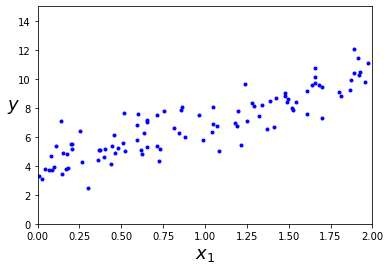

In [6]:
plt.plot(X, y, "b.") # x, y를 좌표평면 상에 뿌리는데 'blue color dot' style로 출력 
plt.xlabel("$x_1$", fontsize=18) # x_label은 x_1를 fortsize = 18로 출력
plt.ylabel("$y$", rotation=0, fontsize=18) # y label 은 y를 회전 없이 fontsize = 18로 출력
plt.axis([0, 2, 0, 15]) # 순서대로 x최소, x 최대, y 최소, y 최대로 스케일 맞춰줌

plt.show()

위 그래프의 점들을 가장 잘 대표하는 선형 그래프를 찾는게 목표

#### sol 1. 정규 방정식을 이용한 수학적 계산을 통한 구현 ####  

**식 4-4: 정규 방정식**

$\hat{\boldsymbol{\theta}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}$  

정규방정식을 통해 예측 가중치(기울기)를 구할 수 있다.  
  
구하는 과정에서 데이터 셋 사이즈가 커지면  
$(\mathbf{X}^T \mathbf{X})^{-1}$ 의 역행렬을 다루기 부담스럽기 때문에  
유사역행렬을 찾아 계산하는 것으로 대체하면 원하는 결과에 근사 가능하다.(특이값 분해, SCD)


In [22]:
X_b = np.c_[np.ones((100, 1)), X] # 모든 셈플에 x0 = 1을 추가함

# 정규방정식 구현
predict_theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) #np.linalg.inv 를 통해 역행렬을 만들고, .T를 통해 전치, .dot를 통해 dot product 실행

In [23]:
# 예측 값 확인
predict_theta_best

array([[3.89391587],
       [3.15102595]])

$\boldsymbol{\theta}_0$, $\boldsymbol{\theta}_1$ 를 순서대로 원소로 가지는 ndarray를 반환  

정확한 값으로 가중치 $\boldsymbol{\theta}_0 = 4$, $\boldsymbol{\theta}_1 = 3$ 을 기대했지만,  
데이터 처리 과정에서 주어진 가우시안 노이즈에 의해 정확한 값으로 근사되지 못했음

In [24]:
# 새로운 점 생성 후 확인 (x = 0, x = 2)
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # 사이즈 맞춰주기 위해

y_predict = X_new_b.dot(predict_theta_best) # 기존 예측 값과 dot product 실행


In [25]:
# 결과 출력
y_predict

array([[ 3.89391587],
       [10.19596778]])

예측 값을 가지고 시각화를 진행

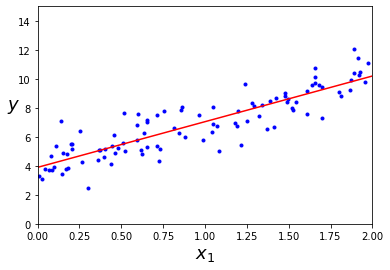

In [26]:
# 기존 fig 위에 그릴 생각
plt.plot(X, y, "b.") # x, y를 좌표평면 상에 뿌리는데 'blue color dot' style로 출력 
plt.xlabel("$x_1$", fontsize=18) # x_label은 x_1를 fortsize = 18로 출력
plt.ylabel("$y$", rotation=0, fontsize=18) # y label 은 y를 회전 없이 fontsize = 18로 출력
plt.axis([0, 2, 0, 15]) # 순서대로 x최소, x 최대, y 최소, y 최대로 스케일 맞춰줌

# 예측 값 표현
plt.plot(X_new, y_predict, "r-")


plt.show()


예측 선이 얼추 맞아 떨어지는 경향이 있음을 확인

#### 특이값 분해(Singular value decomposition, SVD) ####

아직 이해가 잘 안되서 나중에 다시 작성 할 예정 (22-03-30)

#### sklearn LinearRegression 함수 이용 ####
이미 구현되어있는 함수를 이용한 선형 회귀

In [27]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression() # linearRegression 함수 생성
lin_reg.fit(X, y) # 학습(fit) 진행

LinearRegression()

In [ ]:
# 결과 출력
lin_reg.intercept_, lin_reg.coef_ 

sklearn의 LinearRegression 함수는 intercept와 coef를 분리하여 저장.  
  

여기서 intercept_는 편향($\boldsymbol{\theta}_0$, bias), coef는 가중치($\boldsymbol{\theta}_1$, weight)를 나타낸다.

## 경사하강법(Gradient Descent) ##

위 방법들의 계산 복잡도 문제를 해결할 수 있는 새로운 선형 회귀 방법  
이 방법으로는 특성, 훈련 샘플이 매우 많아서 메모리에 모두 담을 수 없을 때도 사용 가능함